In [1]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df=pd.read_csv('C:/houseprice.csv')

In [3]:
df.drop(['zipcode','id'],inplace=True,axis=1)
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21613 non-null  object 
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [7]:
df['floors']=df.floors.astype(int)
df['bathrooms']=df.bathrooms.astype(int)

In [7]:
#BASICS

In [12]:
df[df.price.isnull()]
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df.groupby('bedrooms')['price'].mean()

bedrooms
0     4.095038e+05
1     3.176429e+05
2     4.013727e+05
3     4.662321e+05
4     6.354195e+05
5     7.865998e+05
6     8.255206e+05
7     9.511847e+05
8     1.105077e+06
9     8.939998e+05
10    8.193333e+05
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

In [14]:
len(df['bedrooms'].unique())

13

In [15]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [16]:
print(df.iloc[1:4,2:4])
df.loc[1,'price']

   bedrooms  bathrooms
1         3       2.25
2         2       1.00
3         4       3.00


538000.0

In [17]:
df[['price','bedrooms']].sort_values('bedrooms',ascending=True)[0:5]

,price,bedrooms
9773,355000.0,0
6994,1295650.0,0
9854,235000.0,0
19452,142000.0,0
14423,139950.0,0


In [18]:
df1=pd.DataFrame({'PRICE':df['price']})
df1.head(5)

,PRICE
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [4]:
for i in range(0,21613):
    df['date'][i]=df['date'][i][0:4]

C:\Users\djroc\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [5]:
df['date']=pd.to_numeric(df['date'])
df['yr_built']=df['date']-df['yr_built']
df.rename(columns={'yr_built':'old_house'},inplace=True)

In [6]:
df.drop('date',inplace=True,axis=1)

In [7]:
cont_feat=[]
disc_feat=[]
for feature in df.columns:
    if(len(df[feature].unique())<35):
        disc_feat.append(feature)
    else :
        cont_feat.append(feature)

In [8]:
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

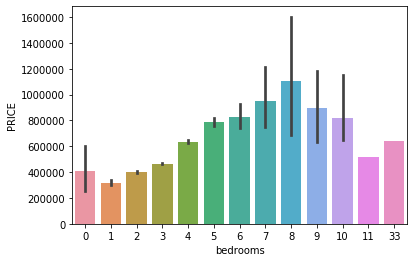

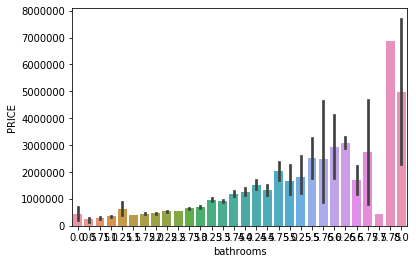

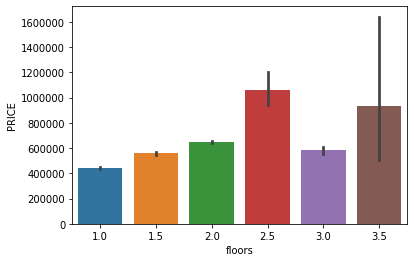

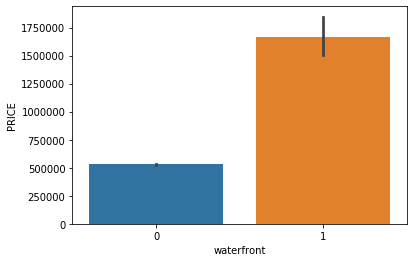

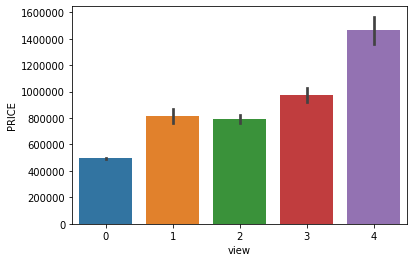

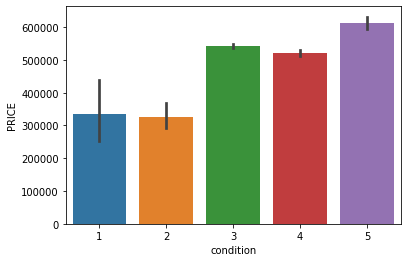

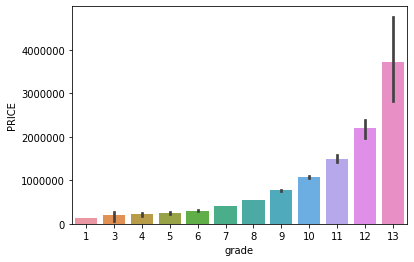

In [8]:
for feature in disc_feat:
    sn.barplot(df[feature],df['price'],estimator=np.mean)
    plt.xlabel(feature)
    plt.ylabel('PRICE')
    plt.show()

In [8]:
from sklearn.feature_selection import VarianceThreshold

In [9]:
y=df['price']
df.drop('price',inplace=True ,axis=1)

In [10]:
y=np.log(y)

In [ ]:
#removing quasi-constant features using VarianceThreshold
#quasi-constant features are the features which are having almost similiar values and such features do not contribute in prediction

In [18]:
trainx=df.copy()

In [19]:
const_feature=VarianceThreshold(0.02)
const_feature.fit(trainx)

VarianceThreshold(threshold=0.02)

In [20]:
const_feature.get_support() 

array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True,  True])

In [21]:
trainx.columns[const_feature.get_support()]

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'old_house',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [15]:
constant_columns = [column for column in trainx.columns
                    if column not in trainx.columns[const_feature.get_support()]]

print((constant_columns))

['waterfront', 'lat', 'long']


In [17]:
trainx.drop(constant_columns,inplace=True,axis=1)
trainx.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'view',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'old_house',
       'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [33]:
trainx.drop(['yr_renovated'],inplace=True,axis=1)

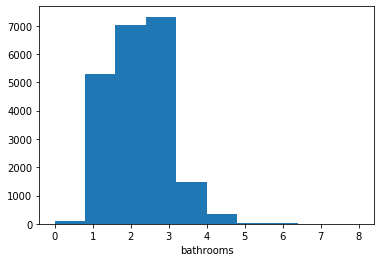

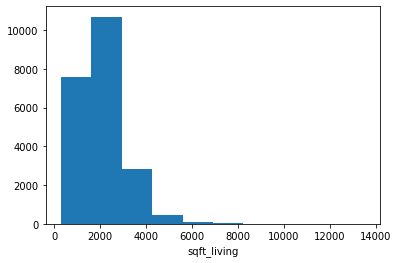

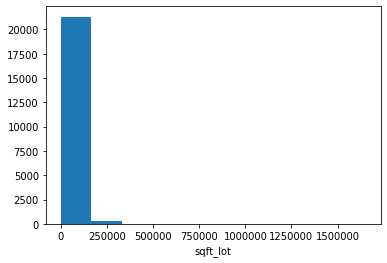

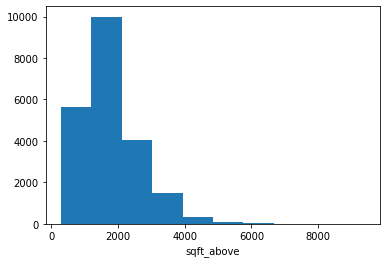

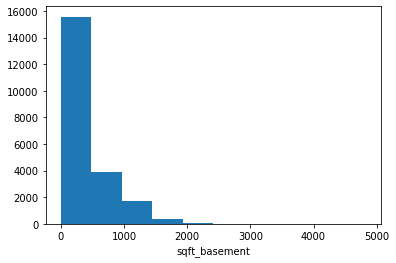

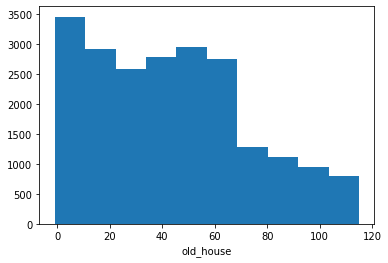

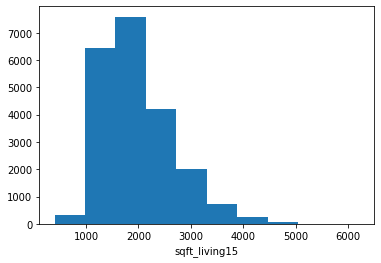

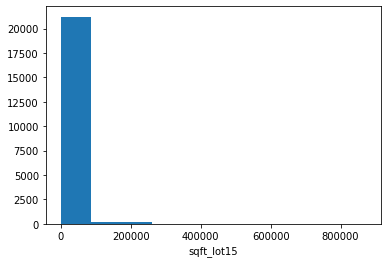

In [40]:
#not normal distributed features
for feature in trainx:
    if feature not in disc_feat: 
        plt.hist(trainx[feature],)
        plt.xlabel(feature)
        plt.show()

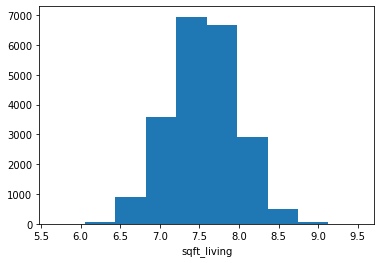

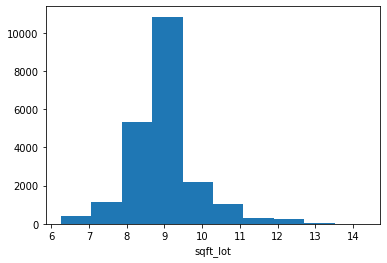

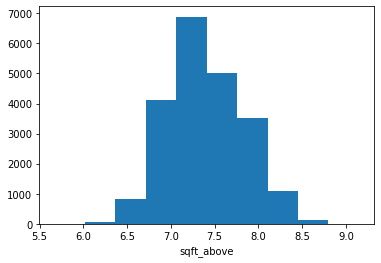

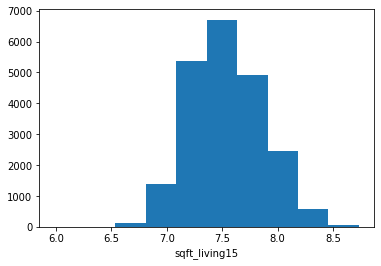

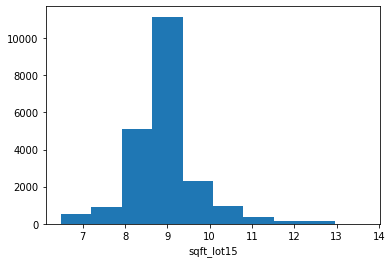

In [19]:
#normaly distributed features
for feature in trainx:
    if feature not in disc_feat:
            if 0 in trainx[feature].unique():
                pass
            else:
                plt.hist(np.log(trainx[feature]))
                plt.xlabel(feature)
                plt.show()

In [22]:
for feature in trainx:
    if feature not in disc_feat and feature!='long':
            if 0 in trainx[feature].unique():
                pass
            else:
                trainx[feature]=np.log(trainx[feature])

In [35]:
trainx.head(5)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,old_house,lat,long,sqft_living15,sqft_lot15
0,3,1.00,7.073270,8.639411,1.0,0,0,3,7,7.073270,0,59,3.860965,-122.257,7.200425,8.639411
1,3,2.25,7.851661,8.887653,2.0,0,0,3,7,7.682482,400,63,3.865372,-122.319,7.432484,8.941022
2,2,1.00,6.646391,9.210340,1.0,0,0,3,6,6.646391,0,82,3.865726,-122.233,7.908387,8.994917
3,4,3.00,7.580700,8.517193,1.0,0,0,5,7,6.956545,910,49,3.861168,-122.393,7.215240,8.517193
4,3,2.00,7.426549,8.997147,1.0,0,0,3,8,7.426549,0,28,3.863186,-122.045,7.495542,8.923058


In [45]:
#Selecting features using information gain
#Information gain calculates the reduction in entropy from the transformation of a dataset.
#It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

In [23]:
from sklearn.feature_selection import mutual_info_classif
importances=mutual_info_classif(trainx,y)

ValueError: Unknown label type: 'continuous'

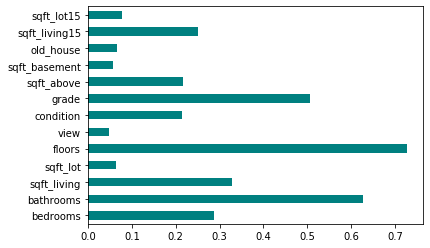

In [239]:
imp_features=pd.Series(importances,trainx.columns[0:len(trainx.columns)])
imp_features.plot(kind='barh',color='teal')
plt.show()

In [224]:
infgain_selection=[]
for feature in trainx:
    if(imp_features[feature]>0.07):
        infgain_selection.append(feature)

In [225]:
infgain_selection

['bedrooms',
 'bathrooms',
 'sqft_living',
 'floors',
 'condition',
 'grade',
 'sqft_above',
 'sqft_living15',
 'sqft_lot15']

In [236]:
#the skfeature is not compatible with this version of python.
#fisher score returns the rank of the features in descending order
from skfeature.function.similarity_based import fisher_score
ranks=fisher_score(trainx,y)
imp__features=pd.Series(ranks,trainx.columns[0:len(trainx.columns)])
imp__features.plot(kind='barh',color='teal')
plt.show()

TypeError: 'module' object is not callable

In [ ]:
#selecting variables using correlation coffecients

In [24]:
cor=trainx.corr()
high_corfeat=[]
for i in range(len(cor.columns)):
    for j in range(len(cor.columns)):
        if abs(cor.iloc[i, j] > 0.6 and cor.iloc[i, j]!=1):
            colname = cor.columns[i]
            high_corfeat.append(colname)

In [25]:
high_corfeat

['bedrooms',
 'bathrooms',
 'bathrooms',
 'bathrooms',
 'sqft_living',
 'sqft_living',
 'sqft_living',
 'sqft_living',
 'sqft_living',
 'sqft_lot',
 'grade',
 'grade',
 'grade',
 'grade',
 'sqft_above',
 'sqft_above',
 'sqft_above',
 'sqft_above',
 'sqft_living15',
 'sqft_living15',
 'sqft_living15',
 'sqft_lot15']

In [26]:
rem_feat=[]
for feature in high_corfeat:
    if feature not in rem_feat :
        if(trainx[feature].corr(np.log(y))<0.5):
            rem_feat.append(feature)
        

In [27]:
rem_feat

['bedrooms', 'sqft_lot', 'sqft_lot15']

In [28]:
imp_feature=[]
for feature in trainx.columns:
    if feature not in rem_feat:
        imp_feature.append(feature)

In [29]:
trainx[imp_feature].corr()

,bathrooms,sqft_living,floors,view,condition,grade,sqft_above,sqft_basement,old_house,sqft_living15
bathrooms,1.000000,0.761304,0.500653,0.187737,-0.124982,0.664983,0.694947,0.283770,-0.506407,0.570828
sqft_living,0.761304,1.000000,0.367569,0.246712,-0.048143,0.743686,0.865378,0.423147,-0.349737,0.746113
floors,0.500653,0.367569,1.000000,0.029444,-0.263768,0.458183,0.547431,-0.245705,-0.489640,0.275275
view,0.187737,0.246712,0.029444,1.000000,0.045990,0.251321,0.158446,0.276947,0.053458,0.263896
condition,-0.124982,-0.048143,-0.263768,0.045990,1.000000,-0.144674,-0.149276,0.174105,0.360665,-0.088963
grade,0.664983,0.743686,0.458183,0.251321,-0.144674,1.000000,0.743397,0.168392,-0.447415,0.688398
sqft_above,0.694947,0.865378,0.547431,0.158446,-0.149276,0.743397,1.000000,-0.050713,-0.451346,0.712608
sqft_basement,0.283770,0.423147,-0.245705,0.276947,0.174105,0.168392,-0.050713,1.000000,0.132865,0.206315
old_house,-0.506407,-0.349737,-0.489640,0.053458,0.360665,-0.447415,-0.451346,0.132865,1.000000,-0.333987
sqft_living15,0.570828,0.746113,0.275275,0.263896,-0.088963,0.688398,0.712608,0.206315,-0.333987,1.000000


In [34]:
#selecting features using dispersion ratio
#dispersion ratio basically tells that how much does the feature samples are distributed about the the central value
#That is how close are the feature samples close to central value.
#Less the disp_ratio more better is the feature.
from scipy.stats.mstats import gmean 
trainxx=trainx.copy()
for feature in trainxx.columns and feature!='long':
    trainxx[feature]=trainxx[feature]+2
    am=np.mean(trainxx[feature])
    gm=gmean(trainxx[feature])
    disp_ratio=am/gm
    print("{}:{}".format(feature,disp_ratio))
#it seems that sqft_basement is not a good feature    

ValueError: The truth value of a Index is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [30]:
#selecting features using MAD
for feature in trainx.columns:
    mean_abs_diff=np.sum(np.abs(trainx[feature]-np.mean(trainx[feature])))/trainx[feature].shape[0]
    print("{}:{}".format(feature,mean_abs_diff))
#it seems that sqft_basement is not a good feature  

bedrooms:0.7349548335864433
bathrooms:0.6153609574123702
sqft_living:0.34116592076337343
sqft_lot:0.6054274626011736
floors:0.4885226404423897
waterfront:0.014969758345815818
view:0.42255489917019895
condition:0.5607190317007043
grade:0.9296003029993664
sqft_above:0.34950222369375483
sqft_basement:363.2358667531935
old_house:24.570114911514647
yr_renovated:161.6658803756157
lat:0.0024154164644387085
long:0.11516089249101558
sqft_living15:0.26580185171272563
sqft_lot15:0.5397049964618407


In [56]:
trainx['old_house']=trainx['old_house']+2

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_std=scaler.fit_transform(trainx)
scaler_std=pd.DataFrame(scaler_std)
scaler_std.columns=trainx.columns

In [2]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression
LinearRegression()

In [38]:
lr=LinearRegression()
ffs=SequentialFeatureSelector(lr,direction='forward',n_jobs=-1)
ffs.fit(scaler_std,y)
ffs.get_support()

array([False,  True,  True, False, False,  True,  True, False,  True,
       False, False,  True,  True, False,  True, False])

In [39]:
trainx.columns[ffs.get_support()]

Index(['bathrooms', 'sqft_living', 'waterfront', 'view', 'grade', 'old_house',
       'lat', 'sqft_living15'],
      dtype='object')

In [40]:
from sklearn.feature_selection import SequentialFeatureSelector
ffs=SequentialFeatureSelector(lr,direction='backward',n_jobs=-1)
ffs.fit(scaler_std,y)
ffs.get_support()
trainx.columns[ffs.get_support()]

Index(['sqft_living', 'floors', 'view', 'condition', 'grade', 'old_house',
       'lat', 'sqft_living15'],
      dtype='object')

In [41]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.ensemble import RandomForestRegressor

In [ ]:
EFS=ExhaustiveFeatureSelector(lr,min_features=3,max_features=8,scoring='r2',n_jobs=-1)
EFS.fit(scaler_std,y)
EFS.best_feature_names_

In [ ]:
EFS.best_idx_

In [43]:
from sklearn.feature_selection import RFE
rfe=RFE(lr,n_features_to_select=5)
rfe.fit(scaler_std,y)
rfe.get_support()

array([False, False,  True, False, False, False,  True, False,  True,
       False, False,  True,  True, False, False, False])

In [44]:
trainx.columns[rfe.get_support()]

Index(['sqft_living', 'view', 'grade', 'old_house', 'lat'], dtype='object')

In [98]:
rfe.ranking_

array([1, 4, 1, 3, 2, 1, 1, 1, 1, 6, 5, 1, 1])

In [45]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [46]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,50,60,70,80,90,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='r2',n_jobs=-1)
lasso_regressor.fit(scaler_std ,y)
lasso_regressor.best_params_

{'alpha': 0.0001}

In [47]:
lasso_regressor.best_score_

0.7668525211898447

In [48]:
feature_sel_model = SelectFromModel(Lasso(alpha=1e-4, random_state=100),max_features=4) # remember to set the seed, the random state in this function
feature_sel_model.fit(scaler_std,y)
scaler_std.columns[feature_sel_model.get_support()]

Index(['sqft_living', 'grade', 'old_house', 'lat'], dtype='object')

In [52]:
rfr=RandomForestRegressor()

parameters={'min_samples_leaf':[5,10,15,20,25,30,40],'min_samples_split':[5,10,15,20,25,30,40]}
randomforest_regressor=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1)
randomforest_regressor.fit(scaler_std ,y)
randomforest_regressor.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 10}

In [54]:
randomforest_regressor.best_params_

{'min_samples_leaf': 5, 'min_samples_split': 10}

In [55]:
feature_sel_model = SelectFromModel(RandomForestRegressor(min_samples_leaf= 5, min_samples_split= 10),max_features=8) # remember to set the seed, the random state in this function
feature_sel_model.fit(scaler_std,y)
scaler_std.columns[feature_sel_model.get_support()]

Index(['sqft_living', 'grade', 'old_house'], dtype='object')

In [49]:
model=RandomForestRegressor(min_samples_leaf= 5, min_samples_split= 10)
model.fit(scaler_std,y)
importances=model.feature_importances_

In [50]:
importances=model.feature_importances_

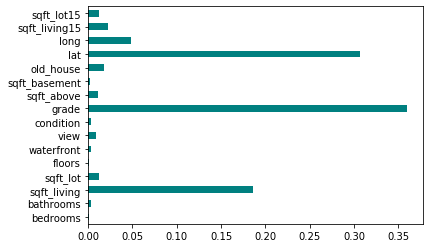

In [51]:
imp_features=pd.Series(importances,scaler_std.columns[0:len(scaler_std.columns)])
imp_features.plot(kind='barh',color='teal')
plt.show()

In [61]:
sel_features=scaler_std[['sqft_lot15','sqft_living15','old_house','grade','sqft_living']]

In [56]:
sel_features=scaler_std[['sqft_living', 'grade', 'old_house']]

In [66]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(trainx,y,train_size=0.8,random_state=100)

In [67]:
lr_model=lr.fit(train_x,train_y)

In [68]:
pred=lr_model.predict(test_x)

In [69]:
from sklearn.metrics import r2_score,mean_squared_error
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.7295796487440332

In [69]:
np.expm1(pred)

array([392622.79185232, 379512.29325902, 485555.63106913, ...,
       669377.61441055, 438030.27338395, 576857.02317451])

In [70]:
lasso=Lasso(alpha=1e-4,max_iter=500)
lasso_model=lasso.fit(train_x,train_y)
pred=lasso_model.predict(test_x)

In [71]:
np.expm1(pred)

array([334893.59337858, 284024.28053701, 455469.94470404, ...,
       636460.39922065, 392782.94534138, 587776.916889  ])

In [72]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.7297285022651511

In [185]:
trainx['old_house']=np.log(trainx['old_house'])

In [171]:
trainxx.drop(['view','lat','long'],inplace=True,axis=1)

In [180]:
trainx.drop(['view','sqft_basement'],inplace=True,axis=1)

In [182]:
trainx['old_house']=trainx['old_house']+2

In [73]:
rf_model=RandomForestRegressor()
rf_model.fit(train_x,train_y)

RandomForestRegressor()

In [74]:
pred=rf_model.predict(test_x)

In [75]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.8760627590947863

In [290]:
np.expm1(pred)

array([418082.10481581, 294630.75551008, 547983.78933095, ...,
       575090.41118918, 479172.41758634, 760191.58689478])

In [291]:
np.expm1(test_y)

19836    284998.0
10442    239948.0
20548    459998.0
11014    397498.0
4138     544998.0
           ...   
5625     234998.0
8698     499998.0
9786     849998.0
2784     339998.0
9552     787998.0
Name: price, Length: 4323, dtype: float64

In [78]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(min_samples_split=8,min_samples_leaf=7)
dtr.fit(train_x,train_y)
pred=dtr.predict(test_x)

In [79]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.7380336798609044

In [3]:
from sklearn.ensemble import AdaBoostRegressor
abr=AdaBoostRegressor(dtr,learning_rate=1e-1,loss='exponential',n_estimators=100)
abr.fit(train_x,train_y)
pred=abr.predict(test_x)

In [81]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.8816745335705367

In [82]:
importances=abr.feature_importances_

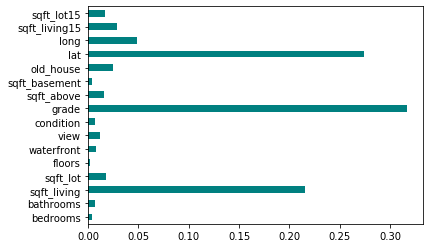

In [83]:
imp_features=pd.Series(importances,scaler_std.columns[0:len(scaler_std.columns)])
imp_features.plot(kind='barh',color='teal')
plt.show()

In [86]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor(loss='ls',learning_rate=0.1,n_estimators=100,min_samples_split=8)
gbr.fit(train_x,train_y)
pred=gbr.predict(test_x)

In [87]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.8535691836829424

In [95]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(learning_rate=1e-1,n_estimators=500)
xgbr.fit(train_x,train_y)
pred=gbr.predict(test_x)

In [96]:
np.abs(r2_score(np.expm1(test_y),np.expm1(pred)))

0.8535691836829424